Pour implémenter une marche aléatoire sur le graphe nous allons utiliser une matrice de transition T.
Cette matrice est définit comme $T = D^{-1} . A$

avec $D$, la matrice des degrés et $A$, la matrice d'adjacence du grpahe.

In [16]:
import networkx as nx
G = nx.Graph()

In [17]:
G.add_node(1)

In [18]:
G.add_nodes_from([2, 3])

In [19]:
G.add_nodes_from([
     (4, {"color": "red"}),
     (5, {"color": "green"}),
 ])

In [20]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [11]:
import matplotlib.pyplot as plt

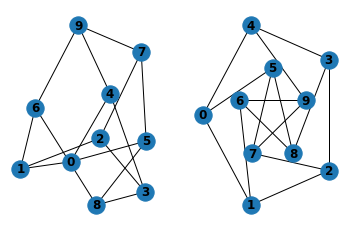

In [12]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


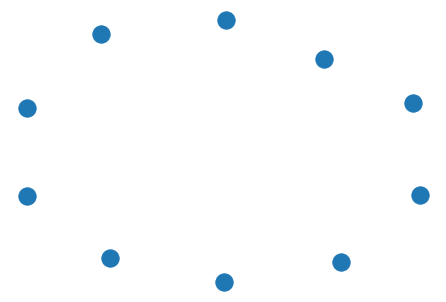

In [21]:
nx.draw(G)

In [54]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}

In [100]:
G = nx.Graph()

In [101]:
G.add_node(3)

In [102]:
import math
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0)])

G.add_weighted_edges_from([(0,1,1),(1,2,1),(2,3,1),(3,0,1),(0,2, 1*math.sqrt(2)),(1,3, 1*math.sqrt(2))])

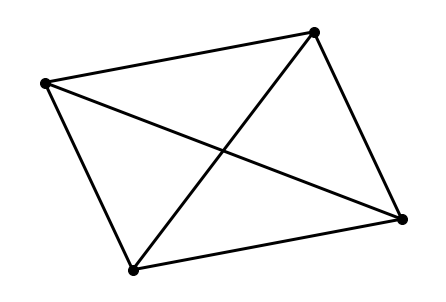

In [103]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
nx.draw(G, **options)

In [104]:
import numpy
A = nx.adjacency_matrix(G)

In [105]:
def edges_to_matrix(G):  ### Fonction permettant de créer la matrice d'adjacence
    E = list(G.out_edges())
    s = len(G.nodes())
    adjacency = [[0]*s for _ in range(s)] #Empty Adjacency list
    for n, e in E:
        adjacency[n][e] = 1
        adjacency[e][n] = 1 # for undirected graph and if we want a symmetric matrix
        
    A = np.array(adjacency)
    
    return A



def degree_to_matrix(G):  #Fonction permettant de créer la matrice des degrés
# This function aims to create the degree matrix from a graph G
    d = list(G.degree())
    s = len(G.nodes())
    N = list(G.nodes())
    
    degree = [[0]*s for _ in range(s)] #Empty Adjacency list
    
    i = 0
    for n in d:
        degree[i][i] = n[1]
        i +=1
        
        
    D = np.array(degree)
    
    return D

[3, 1, 3, 1]


/var/folders/jc/23tmvmc554b_hqpgl1mn9wch0000gq/T/ipykernel_19799/1826114854.py:10: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  A = nx.adj_matrix(g)


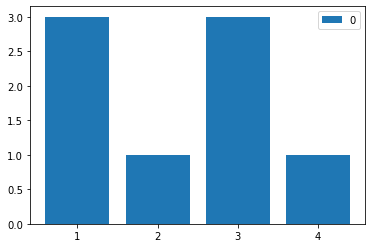

[0, 2, 0, 2]


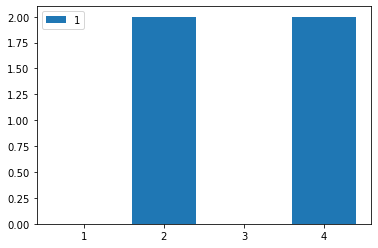

[1, 3, 1, 3]


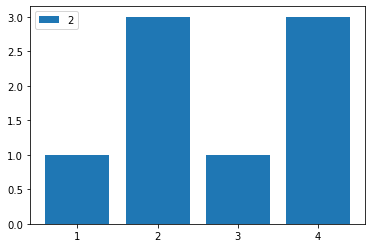

[2, 0, 2, 0]


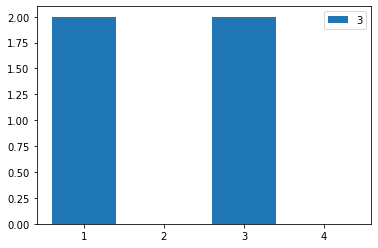

In [117]:
import networkx as nx
import numpy as np
import scipy as sp

g = G
V = list(g.nodes())


#Générons la matrice d'adjacence A du graphe g
A = nx.adj_matrix(g)
A = A.todense()
A = np.array(A, dtype = np.float64)



#Générons la matrice des degrées D

Deg = dict(G.degree)

D = degree_to_matrix(g)

#D = np.array([Deg[i] for i in Deg.keys()])

#print(D)

D = np.linalg.pinv(D)
#D = sp.linalg.pinvh(D)

# Et la matrice de marche aléatoire P
P = np.dot(D,A)

Step = 3 #number of steps


def RandomWalk(node):
  visited = list()

  proba = np.zeros(len(P))
  proba = proba * 10**-3
  X = node
  proba[X] = 1

  visited.append(V[X])

  for t in range(Step):
      proba = np.dot(proba,P)
    #print(proba)
      v = np.argmax(proba)
      if V[v] == 'n0':
          break
      else:
          visited.append(V[v])


  return visited

for i in range(len(V)):
    print(RandomWalk(i))
    plt.bar(['1','2','3','4'],RandomWalk(i))
    plt.legend(f"{i}")
    plt.show()

# Square scenario

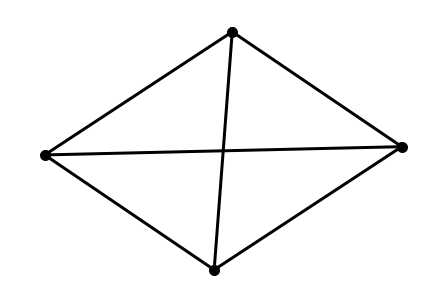

from initial point 0 : ['0', '2']
from initial point 1 : ['1', '3']
from initial point 2 : ['2', '0']
from initial point 3 : ['3', '1']


/var/folders/jc/23tmvmc554b_hqpgl1mn9wch0000gq/T/ipykernel_19799/2794581877.py:29: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  A = nx.adj_matrix(g)


In [183]:
G = nx.Graph()
#G.add_node(["0","1","2","3"])

import math
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0)])

w = 2

G.add_weighted_edges_from([("0","1",w),("1","2",w),("2","3",w),("3","0",w),("0","2", math.sqrt(2*w**2)),("1","3", math.sqrt(2*w**2))])


options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
nx.draw(G, **options, with_labels=True)
plt.show()

import networkx as nx
import numpy as np
import scipy as sp

g = G
V = list(g.nodes())


#Générons la matrice d'adjacence A du graphe g
A = nx.adj_matrix(g)
A = A.todense()
A = np.array(A, dtype = np.float64)



#Générons la matrice des degrées D

Deg = dict(G.degree)

D = degree_to_matrix(g)

#D = np.array([Deg[i] for i in Deg.keys()])

#print(D)

D = np.linalg.pinv(D)
#D = sp.linalg.pinvh(D)

# Et la matrice de marche aléatoire P
P = np.dot(D,A)

Step = 1 #number of steps


def RandomWalk(node):
  visited = list()

  proba = np.zeros(len(P))
  proba = proba * 10**-3
  X = node
  proba[X] = 1

  visited.append(V[X])

  for t in range(Step):
      proba = np.dot(proba,P)
    #print(proba)
      v = np.argmax(proba)
      if V[v] == 'n0':
          break
      else:
          visited.append(V[v])


  return visited


Res = []
for i in range(len(V)) :
    print(f"from initial point {i} :",RandomWalk(i))
    Res.append(RandomWalk(i))
    



Text(0, 0.5, 'Probability')

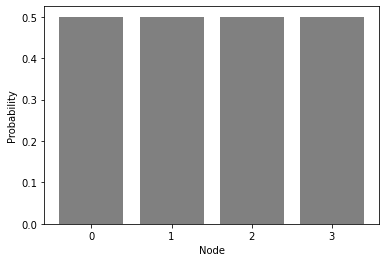

In [184]:
Nodes = ["0","1","2","3"]

ctn0 =0
ctn1 = 0
ctn2 = 0
ctn3 = 0

for i in Res:
    for ii in i:
        if ii == "0" :
            ctn0 +=1
        if ii == "1" :
            ctn1 +=1
        if ii == "2" :
            ctn2 +=1
        if ii == "3" :
            ctn3 +=1
    
    
L = [1/ctn0,1/ctn1,1/ctn2,1/ctn3]

plt.bar(Nodes, L,color=['grey'])
plt.xlabel("Node")
plt.ylabel("Probability")
    

In [176]:
import math 

def entropy(node, Graph):
  S_i = []
  N_i = [i for i in Graph.neighbors(node)]
  W = [float(list(i[2].values())[0]) for i in Graph.edges(data=True)]
  W = max(W)
  if len(N_i) >= 1:
    for i in N_i:
      val = Graph.get_edge_data(node, i)
      for v in val.values(): val = v #Boucle pour extraire la valeur du dictionnaire edge_data (la commande val.values() ne suffit pas)
      val = val/W # Normalisation des valeurs afind d'accorder la plus haute probabilité aux arrêtes ayant le plus fort poids
      ent = val * math.log(val)
      S_i.append(ent)
      #print(ent)
    
    S_i = - sum(S_i)
    return S_i
  return 0





Entropy = {}

Nodes = [i for i in g.nodes()]
#Definissions de l'entropie à chaque noeud
for n in Nodes:
  #print(n)
  Entropy[n] = entropy(n,g)
    
    

    
# Calcul de la probabilité de visite
# Réutilisation du Random Walk

Visitation = {}

for i in range(len(V)):
  Visitation[V[i]] = []
  pp = []
  for y in P:
    pp.append(y[i])
  Visitation[V[i]] = sum(pp)
    

# Calcul de l'entropie du réseau

Network_Entropy = {}
Items = list(Entropy.items())
for i in range(len(Items)):
  Network_Entropy[Items[i][0]] = Items[i][1]


print('Entropie du réseau à chaque noeud = ', Network_Entropy)



# Calcule de l'entropie total du réseau

Total_entropy = sum(list(Network_Entropy.values()))

print('Entropie totale du réseau = ', Total_entropy)
  


Entropie du réseau à chaque noeud =  {'0': 0.49012907173427367, '1': 0.49012907173427367, '2': 0.49012907173427367, '3': 0.49012907173427367}
Entropie totale du réseau =  1.9605162869370947


# Line scenario

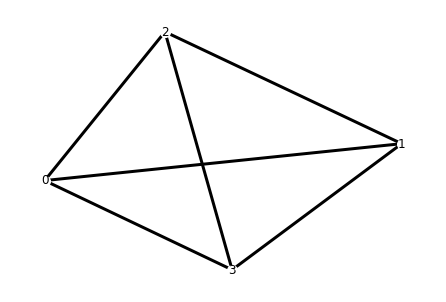

from initial point 0 : ['0', '3']
from initial point 1 : ['1', '3']
from initial point 2 : ['2', '0']
from initial point 3 : ['3', '0']


/var/folders/jc/23tmvmc554b_hqpgl1mn9wch0000gq/T/ipykernel_19799/3351630404.py:29: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  A = nx.adj_matrix(g)


In [190]:
G = nx.Graph()
#G.add_node(["0","1","2","3"])

import math
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0)])

w = 1

G.add_weighted_edges_from([("0","1",w),("1","2",w*2),("2","3",w),("3","0",w*4),("0","2", w*3),("1","3", w*3)])


options = {
    'node_color': 'white',
    'node_size': 100,
    'width': 3,
}
nx.draw(G, with_labels=True,**options)
plt.show()

import networkx as nx
import numpy as np
import scipy as sp

g = G
V = list(g.nodes())


#Générons la matrice d'adjacence A du graphe g
A = nx.adj_matrix(g)
A = A.todense()
A = np.array(A, dtype = np.float64)



#Générons la matrice des degrées D

Deg = dict(G.degree)

D = degree_to_matrix(g)

#D = np.array([Deg[i] for i in Deg.keys()])

#print(D)

D = np.linalg.pinv(D)
#D = sp.linalg.pinvh(D)

# Et la matrice de marche aléatoire P
P = np.dot(D,A)

Step = 1 #number of steps


def RandomWalk(node):
  visited = list()

  proba = np.zeros(len(P))
  proba = proba * 10**-3
  X = node
  proba[X] = 1

  visited.append(V[X])

  for t in range(Step):
      proba = np.dot(proba,P)
    #print(proba)
      v = np.argmax(proba)
      if V[v] == 'n0':
          break
      else:
          visited.append(V[v])


  return visited


Res = []
for i in range(len(V)) :
    print(f"from initial point {i} :",RandomWalk(i))
    Res.append(RandomWalk(i))

<BarContainer object of 4 artists>

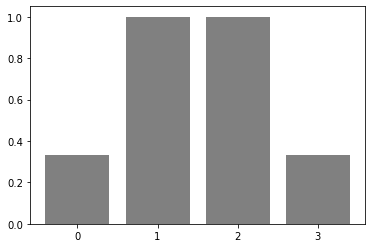

In [186]:
Nodes = ["0","1","2","3"]

ctn0 =0
ctn1 = 0
ctn2 = 0
ctn3 = 0

for i in Res:
    for ii in i:
        if ii == "0" :
            ctn0 +=1
        if ii == "1" :
            ctn1 +=1
        if ii == "2" :
            ctn2 +=1
        if ii == "3" :
            ctn3 +=1
    
    
L = [1/ctn0,1/ctn1,1/ctn2,1/ctn3]

plt.bar(Nodes, L, color =['grey'])
    

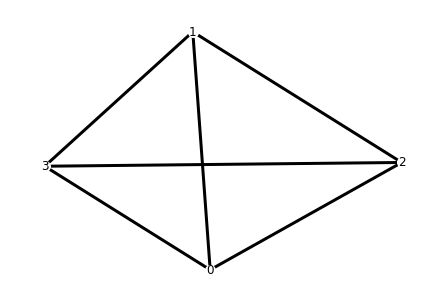

from initial point 0 : ['0', '3', '0']
from initial point 1 : ['1', '3', '0']
from initial point 2 : ['2', '0', '3']
from initial point 3 : ['3', '0', '3']


/var/folders/jc/23tmvmc554b_hqpgl1mn9wch0000gq/T/ipykernel_19799/3789880793.py:30: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  A = nx.adj_matrix(g)


In [191]:
G = nx.Graph()
#G.add_node(["0","1","2","3"])

import math
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0)])

w = 1

G.add_weighted_edges_from([("0","1",w),("1","2",w*2),("2","3",w),("3","0",w*4),("0","2", w*3),("1","3", w*3)])



options = {
    'node_color': 'white',
    'node_size': 100,
    'width': 3,
}
nx.draw(G, with_labels=True,**options)
plt.show()

import networkx as nx
import numpy as np
import scipy as sp

g = G
V = list(g.nodes())


#Générons la matrice d'adjacence A du graphe g
A = nx.adj_matrix(g)
A = A.todense()
A = np.array(A, dtype = np.float64)



#Générons la matrice des degrées D

Deg = dict(G.degree)

D = degree_to_matrix(g)

#D = np.array([Deg[i] for i in Deg.keys()])

#print(D)

D = np.linalg.pinv(D)
#D = sp.linalg.pinvh(D)

# Et la matrice de marche aléatoire P
P = np.dot(D,A)

Step = 2 #number of steps


def RandomWalk(node):
  visited = list()

  proba = np.zeros(len(P))
  proba = proba * 10**-3
  X = node
  proba[X] = 1

  visited.append(V[X])

  for t in range(Step):
      proba = np.dot(proba,P)
    #print(proba)
      v = np.argmax(proba)
      if V[v] == 'n0':
          break
      else:
          visited.append(V[v])


  return visited


Res = []
for i in range(len(V)) :
    print(f"from initial point {i} :",RandomWalk(i))
    Res.append(RandomWalk(i))

# Entropy

### Entropie du réseau
Nous définissons l'entropie à chaque noeuds comme :

$S_i = - \sum_{j \in N_i} p_{ij} $ $\text{log}$  $p_{ij}$

avec i, le ième noeud et N_i l'ensemble des voisins de i.

De plus, introduisons $\pi_i$, la probabilité de visite d'un noeud i. Ainsi on obtient le taux d'entropy pour chaque noeud :

$H_i = - \pi_i \sum_{j \in N_i} p_{ij} $ $\text{log}$  $p_{ij}$

et finalement on décrit le taux d'entropy du réseau comme :

$H = \sum_{i \in N} H_i$

Robustesse :

$\Delta H \Delta R > 0$


In [168]:
import math 

def entropy(node, Graph):
  S_i = []
  N_i = [i for i in Graph.neighbors(node)]
  W = [float(list(i[2].values())[0]) for i in Graph.edges(data=True)]
  W = max(W)
  if len(N_i) >= 1:
    for i in N_i:
      val = Graph.get_edge_data(node, i)
      for v in val.values(): val = v #Boucle pour extraire la valeur du dictionnaire edge_data (la commande val.values() ne suffit pas)
      val = val/W # Normalisation des valeurs afind d'accorder la plus haute probabilité aux arrêtes ayant le plus fort poids
      ent = val * math.log(val)
      S_i.append(ent)
      #print(ent)
    
    S_i = - sum(S_i)
    return S_i
  return 0

In [169]:
Entropy = {}

Nodes = [i for i in g.nodes()]
#Definissions de l'entropie à chaque noeud
for n in Nodes:
  #print(n)
  Entropy[n] = entropy(n,g)
  


In [170]:
# Calcul de la probabilité de visite
# Réutilisation du Random Walk

Visitation = {}

for i in range(len(V)):
  Visitation[V[i]] = []
  pp = []
  for y in P:
    pp.append(y[i])
  Visitation[V[i]] = sum(pp)
    



In [172]:
# Calcul de l'entropie du réseau

Network_Entropy = {}
Items = list(Entropy.items())
for i in range(len(Items)):
  Network_Entropy[Items[i][0]] = Items[i][1]


print('Entropie du réseau à chaque noeud = ', Network_Entropy)

Entropie du réseau à chaque noeud =  {'0': 0.5623351446188083, '1': 0.908908734898781, '2': 0.908908734898781, '3': 0.5623351446188083}


In [173]:
# Calcule de l'entropie total du réseau

Total_entropy = sum(list(Network_Entropy.values()))

print('Entropie totale du réseau = ', Total_entropy)

Entropie totale du réseau =  2.9424877590351786
